<a href="https://colab.research.google.com/github/AndresT-2000/TriageColab/blob/main/Triage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Archivo cargado exitosamente.
esi          2457
age            11
gender          0
ethnicity       0
race           26
dtype: int64
esi          0
age          0
gender       0
ethnicity    0
race         0
dtype: int64
Vista previa de los datos:
   esi   age  gender           ethnicity  \
0  4.0  40.0    Male  Hispanic or Latino   
1  4.0  66.0    Male  Hispanic or Latino   
2  2.0  66.0    Male  Hispanic or Latino   
3  2.0  66.0    Male  Hispanic or Latino   
4  3.0  84.0  Female  Hispanic or Latino   

                                        race  
0                         White or Caucasian  
1  Native Hawaiian or Other Pacific Islander  
2  Native Hawaiian or Other Pacific Islander  
3  Native Hawaiian or Other Pacific Islander  
4                                      Other  

Información general sobre el conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
Index: 557992 entries, 0 to 560485
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  -----

<ipython-input-1-54caa4162f2e>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='esi', palette='viridis')


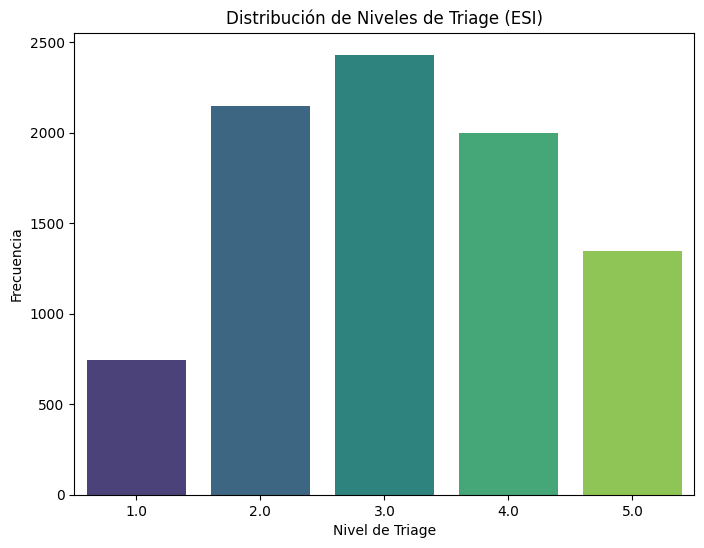

<ipython-input-1-54caa4162f2e>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='Set2')


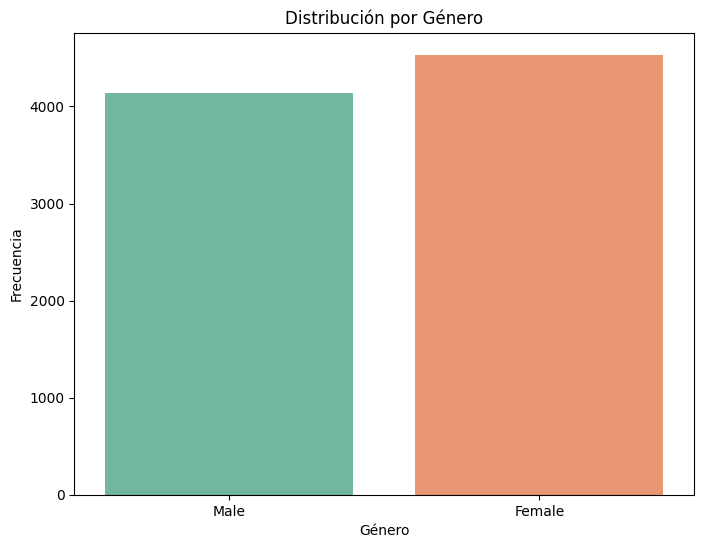

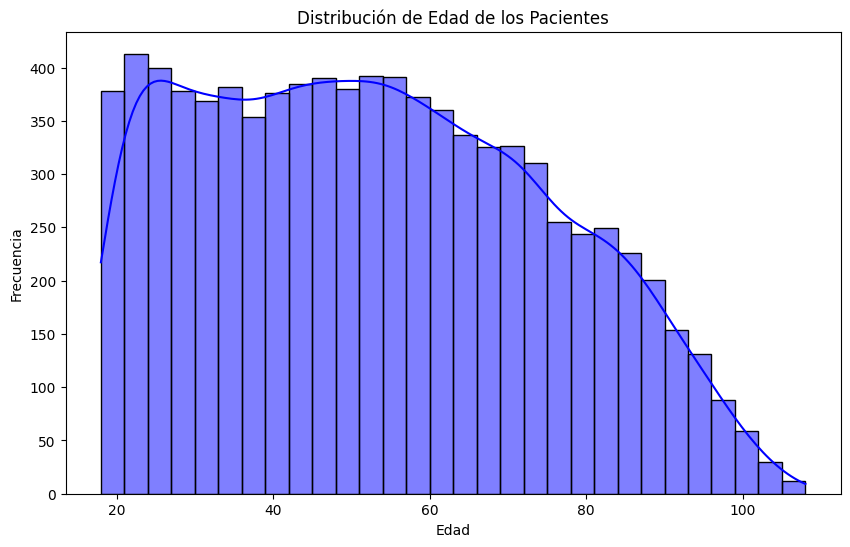

<ipython-input-1-54caa4162f2e>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='esi', y='age', palette='coolwarm')


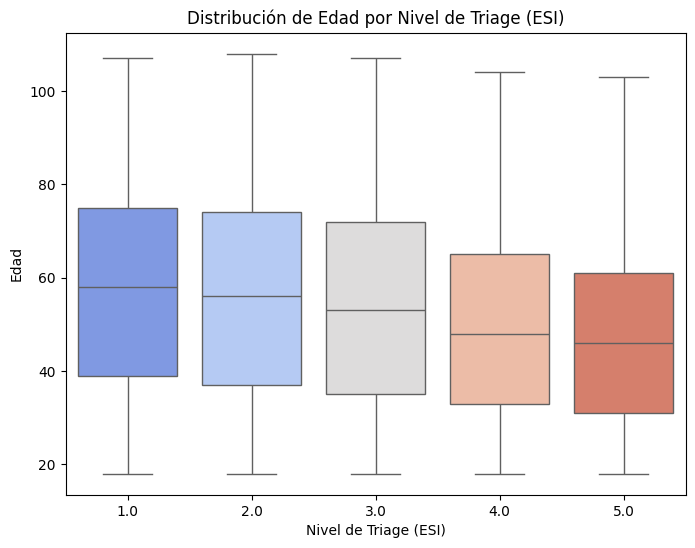

El subconjunto de datos se ha guardado en: subconjunto_tratado.csv

Análisis completado exitosamente.


In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
ruta_csv = "/content/drive/MyDrive/Colab Notebooks/Hospital Triage and Patient History.csv"

# Utilizar el parámetro `usecols` para cargar las columnas
columnas_relevantes = ['esi', 'age', 'gender', 'ethnicity', 'race']
try:
    # Leer el CSV por partes (chunks) para manejar grandes volúmenes de datos
    data_chunks = pd.read_csv(ruta_csv, usecols=columnas_relevantes, chunksize=50000)

    # Combinar todos los chunks en un solo DataFrame
    df = pd.concat(data_chunks, ignore_index=True)
    print("Archivo cargado exitosamente.")
except Exception as e:
    print("Error al cargar el archivo:", e)
    exit()

# Detectar valores nulos
print(df.isnull().sum())

# Detectar valores igual a 0 (si aplica como dato vacío en tu caso)
print((df == 0).sum())

# Eliminar filas con valores nulos
df = df.dropna()

# Eliminar columnas con valores nulos
df = df.dropna(axis=1)

# Mostrar las primeras filas del DataFrame para verificar la carga
print("Vista previa de los datos:")
print(df.head())

# Información básica sobre los datos
print("\nInformación general sobre el conjunto de datos:")
print(df.info())

# Limpieza y preprocesamiento de datos
print("\nIniciando limpieza de datos...")
# Reemplazar valores faltantes o nulos
df.fillna({'esi': -1, 'age': df['age'].median(), 'gender': 'Unknown', 'ethnicity': 'Unknown', 'race': 'Unknown'}, inplace=True)

# Verificar si existen valores duplicados
if df.duplicated().any():
    print("Se encontraron valores duplicados. Eliminándolos...")
    df = df.drop_duplicates()

print("Limpieza de datos completada.")

# Análisis descriptivo
print("\nResumen descriptivo del conjunto de datos:")
print(df.describe(include='all'))

# Análisis visual
print("\nGenerando gráficos de análisis...")
# Distribución de los niveles de triage (esi)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='esi', palette='viridis')
plt.title('Distribución de Niveles de Triage (ESI)')
plt.xlabel('Nivel de Triage')
plt.ylabel('Frecuencia')
plt.show()

# Distribución por género
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', palette='Set2')
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

# Distribución por grupo de edad
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=30, kde=True, color='blue')
plt.title('Distribución de Edad de los Pacientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Ejemplo de análisis adicional: correlación entre edad y nivel de triage
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='esi', y='age', palette='coolwarm')
plt.title('Distribución de Edad por Nivel de Triage (ESI)')
plt.xlabel('Nivel de Triage (ESI)')
plt.ylabel('Edad')
plt.show()

# Exportar un subconjunto del DataFrame (opcional)
ruta_salida = "subconjunto_tratado.csv"
try:
    df.to_csv(ruta_salida, index=False)
    print(f"El subconjunto de datos se ha guardado en: {ruta_salida}")
except Exception as e:
    print("Error al guardar el archivo:", e)

# Fin del script
print("\nAnálisis completado exitosamente.")
